In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Separate features and target
X = df.drop(columns=['Target'])  # Replace 'Target' with the actual target column name
y = df['Target']  # Replace 'Target' with the actual target column name

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286*0.35 ≈ 0.15

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(r2, 2), round(medae, 2), round(mae, 2), round(rmse, 2)

# Function to calculate additional statistics
def calculate_statistics(y_pred):
    std_dev = np.std(y_pred)
    avg = np.mean(y_pred)
    min_val = np.min(y_pred)
    max_val = np.max(y_pred)
    return round(std_dev, 2), round(avg, 2), round(min_val, 2), round(max_val, 2)

# Validation set evaluation
r2_val, medae_val, mae_val, rmse_val = evaluate_model(y_val, y_val_pred)
val_std_dev, val_avg, val_min, val_max = calculate_statistics(y_val_pred)
print("Validation Metrics:")
print(f"R²: {r2_val}, MedAE: {medae_val}, MAE: {mae_val}, RMSE: {rmse_val}")
print(f"Std Dev: {val_std_dev}, Avg: {val_avg}, Min: {val_min}, Max: {val_max}\n")

# Test set evaluation
r2_test, medae_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred)
test_std_dev, test_avg, test_min, test_max = calculate_statistics(y_test_pred)
print("Test Metrics:")
print(f"R²: {r2_test}, MedAE: {medae_test}, MAE: {mae_test}, RMSE: {rmse_test}")
print(f"Std Dev: {test_std_dev}, Avg: {test_avg}, Min: {test_min}, Max: {test_max}")

Validation Metrics:
R²: 0.76, MedAE: 2.98, MAE: 33.4, RMSE: 103.98
Std Dev: 206.72, Avg: 175.81, Min: 0.0, Max: 524.84

Test Metrics:
R²: 0.79, MedAE: 5.93, MAE: 38.66, RMSE: 100.48
Std Dev: 206.09, Avg: 227.62, Min: 0.0, Max: 503.91


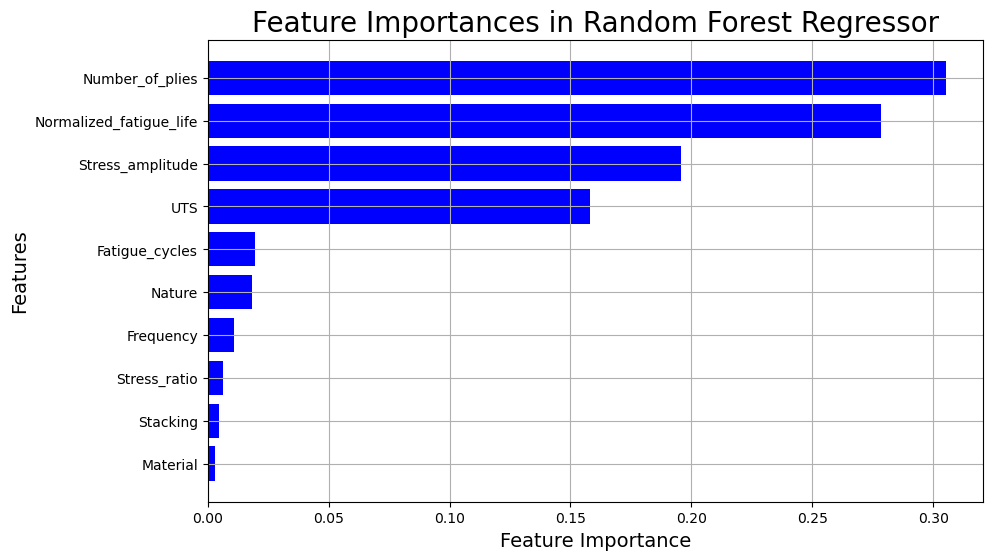

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a sorted order of features based on importance
sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances in Random Forest Regressor', fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('RFR.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Separate features and target
X = df.drop(columns=['Target'])  # Replace 'target_column' with the actual target column name
y = df['Target']  # Replace 'target_column' with the actual target column name

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286*0.35 ≈ 0.15

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor and GridSearchCV
rf = RandomForestRegressor(random_state=42)
RF_GS = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
RF_GS.fit(X_train, y_train)

# Best parameters and cross-validated R² score
best_params = RF_GS.best_params_
cv_r2_score = RF_GS.best_score_
print(f"Best Parameters: {best_params}")
print(f"Cross-Validated R² Score: {cv_r2_score:.2f}")

# Predict on validation and test sets using the best estimator
y_val_pred = RF_GS.predict(X_val)
y_test_pred_gs = RF_GS.predict(X_test)

# Calculate evaluation metrics
metrics = {
    'R²': (r2_score(y_val, y_val_pred), r2_score(y_test, y_test_pred_gs)),
    'MedAE': (median_absolute_error(y_val, y_val_pred), median_absolute_error(y_test, y_test_pred_gs)),
    'MAE': (mean_absolute_error(y_val, y_val_pred), mean_absolute_error(y_test, y_test_pred_gs))
}

# Print evaluation metrics with 2 decimal places
print("\nValidation Metrics:")
print(f"R²: {metrics['R²'][0]:.2f}, MedAE: {metrics['MedAE'][0]:.2f}, MAE: {metrics['MAE'][0]:.2f}")
print("\nTest Metrics:")
print(f"R²: {metrics['R²'][1]:.2f}, MedAE: {metrics['MedAE'][1]:.2f}, MAE: {metrics['MAE'][1]:.2f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validated R² Score: 0.90

Validation Metrics:
R²: 0.73, MedAE: 3.28, MAE: 35.83

Test Metrics:
R²: 0.76, MedAE: 5.04, MAE: 40.49


In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Separate features and target
X = df.drop(columns=['Target'])  # Replace 'Target' with the actual target column name
y = df['Target']  # Replace 'Target' with the actual target column name

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286*0.35 ≈ 0.15

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor and GridSearchCV
rf = RandomForestRegressor(random_state=42)
RF_GS = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
RF_GS.fit(X_train, y_train)

# Best parameters and cross-validated R² score
best_params = RF_GS.best_params_
cv_r2_score = RF_GS.best_score_
print(f"Best Parameters: {best_params}")
print(f"Cross-Validated R² Score: {cv_r2_score:.2f}")

# Predict on validation and test sets using the best estimator
y_val_pred = RF_GS.predict(X_val)
y_test_pred_gs = RF_GS.predict(X_test)

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(r2, 2), round(medae, 2), round(mae, 2), round(rmse, 2)

# Function to calculate additional statistics
def calculate_statistics(y_pred):
    std_dev = np.std(y_pred)
    avg = np.mean(y_pred)
    min_val = np.min(y_pred)
    max_val = np.max(y_pred)
    return round(std_dev, 2), round(avg, 2), round(min_val, 2), round(max_val, 2)

# Validation set evaluation
r2_val, medae_val, mae_val, rmse_val = evaluate_model(y_val, y_val_pred)
val_std_dev, val_avg, val_min, val_max = calculate_statistics(y_val_pred)
print("\nValidation Metrics:")
print(f"R²: {r2_val}, MedAE: {medae_val}, MAE: {mae_val}, RMSE: {rmse_val}")
print(f"Std Dev: {val_std_dev}, Avg: {val_avg}, Min: {val_min}, Max: {val_max}")

# Test set evaluation
r2_test, medae_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred_gs)
test_std_dev, test_avg, test_min, test_max = calculate_statistics(y_test_pred_gs)
print("\nTest Metrics:")
print(f"R²: {r2_test}, MedAE: {medae_test}, MAE: {mae_test}, RMSE: {rmse_test}")
print(f"Std Dev: {test_std_dev}, Avg: {test_avg}, Min: {test_min}, Max: {test_max}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validated R² Score: 0.90

Validation Metrics:
R²: 0.73, MedAE: 3.28, MAE: 35.83, RMSE: 109.63
Std Dev: 207.33, Avg: 176.25, Min: 0.0, Max: 522.79

Test Metrics:
R²: 0.76, MedAE: 5.04, MAE: 40.49, RMSE: 107.21
Std Dev: 208.64, Avg: 229.9, Min: 0.0, Max: 514.27


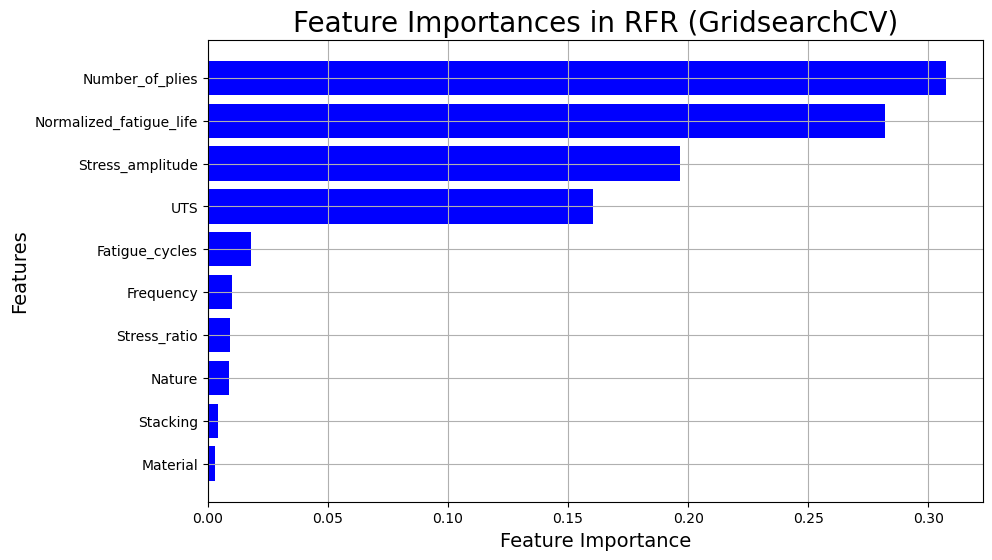

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the best model
feature_importances = RF_GS.best_estimator_.feature_importances_
features = X.columns

# Sort features by importance in ascending order
sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances in RFR (GridsearchCV)', fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('RFR GS.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

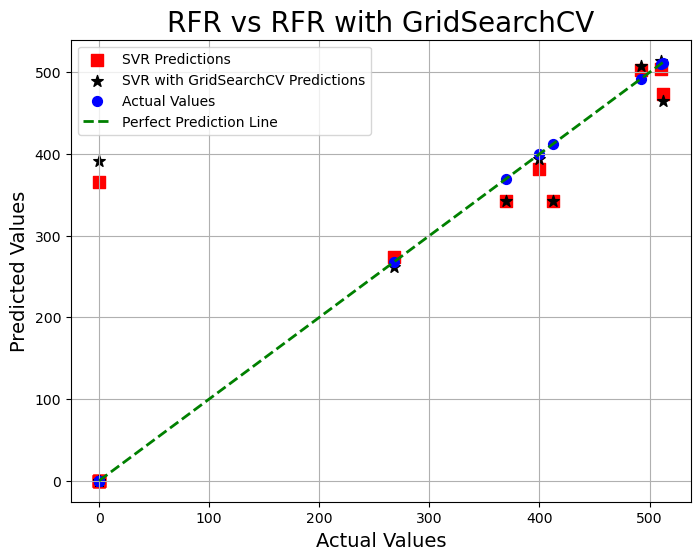

In [ ]:
# Generate Scatter Plot for ElasticNet vs GridSearchCV ElasticNet
plt.figure(figsize=(8, 6))

# Plot predictions from ElasticNet
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="SVR Predictions")

# Plot predictions from GridSearchCV ElasticNet
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="SVR with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("RFR vs RFR with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('RFR vs RFR with gridserach.tiff')

# Show plot
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


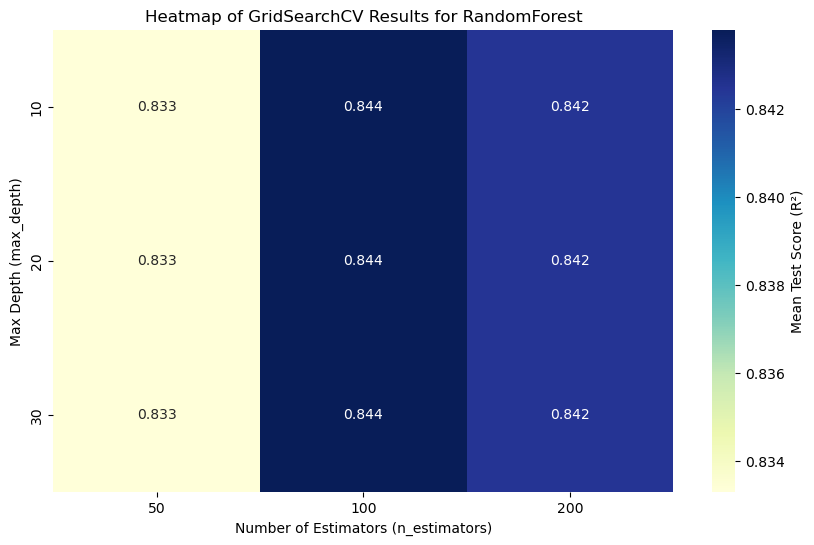

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('New Dataframe.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the data into train (65%), validate (20%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 ≈ 15/35

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the results from GridSearchCV
cv_results = grid_search.cv_results_

# Create a DataFrame for the mean test scores for each parameter combination
results_df = pd.DataFrame(cv_results)

# For the heatmap, we need to focus on pairs of parameters.
# We will use 'mean_test_score' for visualization.
heatmap_data = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f", cbar_kws={'label': 'Mean Test Score (R²)'})
plt.title('Heatmap of GridSearchCV Results for RandomForest')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Max Depth (max_depth)')
plt.show()